<a href="https://colab.research.google.com/github/vinay10949/AnalyticsAndML/blob/master/Kaggle/HomeDepotProductSearchRelevance/Home_Depot_Product_Search_Relevance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align:center;font-size:30px;" > Home Depot Product Search Relevance</h1>


<h1> 1. Business Problem </h1>

<h4>Shoppers rely on Home Depot’s product authority to find and buy the latest products and to get timely solutions to their home improvement needs. From installing a new ceiling fan to remodeling an entire kitchen, with the click of a mouse or tap of the screen, customers expect the correct results to their queries – quickly. Speed, accuracy and delivering a frictionless customer experience are essential.</h4>

**<h4>To help them improve their customers' shopping experience by developing a model that can accurately predict the relevance of search results</h4>**.
<h4>
Search relevancy is an implicit measure Home Depot uses to gauge how quickly they can get customers to the right products. Currently, human raters evaluate the impact of potential changes to their search algorithms, which is a slow and subjective process. By removing or minimizing human input in search relevance evaluation, Home Depot hopes to increase the number of iterations their team can perform on the current search algorithms.</h4>




**__Problem Statement__**
- Predict the relevance of search results on homedepot.com.

- Model Interpretibility partially important

- Low Latency and accuracy is utmost important

**Constraints**
1. The cost of a error can be very high.
2. Latency concerns.



**Metric(s)**: 

  **Root mean squared error (RMSE).**. 


<h1>File descriptions</h1>

    train.csv - the training set, contains products, searches, and relevance scores
    test.csv - the test set, contains products and searches. You must predict the relevance for these pairs.
    product_descriptions.csv - contains a text description of each product. You may join this table to the training or test set via the product_uid.
    attributes.csv -  provides extended information about a subset of the products (typically representing detailed technical specifications). Not every product will have attributes.
    sample_submission.csv - a file showing the correct submission format
    relevance_instructions.docx - the instructions provided to human raters

<h1>Data fields</h1>

    id - a unique Id field which represents a (search_term, product_uid) pair
    product_uid - an id for the products
    product_title - the product title
    product_description - the text description of the product (may contain HTML content)
    search_term - the search query
    relevance - the average of the relevance ratings for a given id
    name - an attribute name
    value - the attribute's value


#Downloading Dataset

In [6]:
!pip install --user kaggle
!mkdir .kaggle
import json
token = {"username":"vinay10949","key":"8c9be451097008f8adad47969b0eff60"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json


mkdir: cannot create directory ‘.kaggle’: File exists


In [7]:
!kaggle competitions list -s search

ref                                       deadline             category   reward  teamCount  userHasEntered  
----------------------------------------  -------------------  --------  -------  ---------  --------------  
crowdflower-search-relevance              2015-07-06 23:59:00  Featured  $20,000       1324           False  
home-depot-product-search-relevance       2016-04-25 23:59:00  Featured  $40,000       2122            True  
yandex-personalized-web-search-challenge  2014-01-10 23:59:00  Featured   $9,000        194           False  
expedia-personalized-sort                 2013-11-04 23:59:00  Featured  $25,000        336           False  
acm-sf-chapter-hackathon-small            2012-09-30 01:00:00  Research     $600         96           False  
acm-sf-chapter-hackathon-big              2012-09-30 01:00:00  Research   $1,000         24           False  


In [10]:
!kaggle competitions download home-depot-product-search-relevance

  0% 0.00/2.51M [00:00<?, ?B/s]
100% 2.51M/2.51M [00:00<00:00, 84.1MB/s]
  0% 0.00/105k [00:00<?, ?B/s]
100% 105k/105k [00:00<00:00, 84.2MB/s]
 33% 9.00M/27.2M [00:00<00:01, 16.9MB/s]
100% 27.2M/27.2M [00:00<00:00, 37.1MB/s]
100% 4.74M/4.74M [00:00<00:00, 9.76MB/s]

  0% 0.00/227k [00:00<?, ?B/s]
100% 227k/227k [00:00<00:00, 73.2MB/s]
 49% 17.0M/34.8M [00:00<00:01, 11.8MB/s]
100% 34.8M/34.8M [00:01<00:00, 35.9MB/s]


In [12]:
!sudo unzip '*.zip'

Archive:  test.csv.zip
  inflating: test.csv                

Archive:  product_descriptions.csv.zip
  inflating: product_descriptions.csv  

Archive:  attributes.csv.zip
  inflating: attributes.csv          

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   

Archive:  train.csv.zip
  inflating: train.csv               

5 archives were successfully processed.


#Importing libraries

In [13]:
import pandas as pd

#Reading the data

In [99]:
attributes=pd.read_csv("attributes.csv")
prodDesc=pd.read_csv("product_descriptions.csv")
train=pd.read_csv("train.csv", encoding = "ISO-8859-1")
test=pd.read_csv("test.csv", encoding = "ISO-8859-1")
attributes=attributes[~attributes['product_uid'].isnull()]
attributes['product_uid']=attributes['product_uid'].astype('int64')

#EDA

In [100]:
print("Train shape ",train.shape)
print("Test shape ",test.shape)
print("Product Descriptions shape shape ",prodDesc.shape)
print("Attributes shape ",attributes.shape)

Train shape  (74067, 5)
Test shape  (166693, 4)
Product Descriptions shape shape  (124428, 2)
Attributes shape  (2044648, 3)


##Checking Missing Columns

In [101]:
print("Number of columns in missing values in train",train.isnull().sum().sum())
print("Number of columns in missing values in test ",test.isnull().sum().sum())
print("Number of columns in missing values in attributes ",attributes.isnull().sum().sum())
print("Number of columns in missing values in product descriptions ",prodDesc.isnull().sum().sum())

Number of columns in missing values in train 0
Number of columns in missing values in test  0
Number of columns in missing values in attributes  2129
Number of columns in missing values in product descriptions  0


In [121]:
train_1=pd.merge(train,prodDesc,on='product_uid',how='left')
train_2=pd.merge(train_1,attributes,on='product_uid',how='left')

test_1=pd.merge(test,prodDesc,on='product_uid',how='left')
test_2=pd.merge(test_1,attributes,on='product_uid',how='left')

##Checking distribution of relevant queries

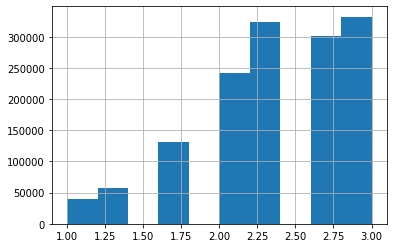

In [130]:
train_2['relevance'].hist()

Relevance distribution is like walking steps, ideally we need to have higher precison on irrelevant queries

In [122]:
print("Missing values in train \n",train_2.isnull().sum())

print("Missing values in test \n ",test_2.isnull().sum())

Missing values in train 
 id                         0
product_uid                0
product_title              0
search_term                0
relevance                  0
product_description        0
name                   17520
value                  18820
dtype: int64
Missing values in test 
  id                         0
product_uid                0
product_title              0
search_term                0
product_description        0
name                   28305
value                  31626
dtype: int64


In [110]:
attributes.isnull().sum().sum()



attributes[attributes['value'].isnull()]

,product_uid,name,value
1022,100044,Collection Name,NaN
1349,100058,Battery Size,NaN
5909,100248,Fastener Thread Type,NaN
6367,100266,Drive Style,NaN
7898,100329,Fastener recommendation,NaN
...,...,...,...
2040533,224234,Hardware Finish Family,NaN
2040775,224246,Mosaic Sub Unit Length (in.),NaN
2040776,224246,Mosaic Sub Unit Width (in.),NaN
2041817,224289,Bore offset,NaN


In [ ]:
train_2['product_uid'].value_counts().plot('log')

In [129]:
train_2[train_2['product_uid']==103763]

,id,product_uid,product_title,search_term,relevance,product_description,name,value
172461,20493,103763,Whirlpool Gold Series Top Control Dishwasher i...,24 stainless gas range,1.33,Leave the cleaning decisions to this Whirlpool...,Amperage (amps),15
172462,20493,103763,Whirlpool Gold Series Top Control Dishwasher i...,24 stainless gas range,1.33,Leave the cleaning decisions to this Whirlpool...,Appliance Series,Whirlpool Gold
172463,20493,103763,Whirlpool Gold Series Top Control Dishwasher i...,24 stainless gas range,1.33,Leave the cleaning decisions to this Whirlpool...,Appliance Type,Dishwasher
172464,20493,103763,Whirlpool Gold Series Top Control Dishwasher i...,24 stainless gas range,1.33,Leave the cleaning decisions to this Whirlpool...,Bullet01,Fully integrated controls provide a modern ext...
172465,20493,103763,Whirlpool Gold Series Top Control Dishwasher i...,24 stainless gas range,1.33,Leave the cleaning decisions to this Whirlpool...,Bullet02,Quiet Partner II sound package allows you to r...
...,...,...,...,...,...,...,...,...
173296,20530,103763,Whirlpool Gold Series Top Control Dishwasher i...,Whirpool washer,2.33,Leave the cleaning decisions to this Whirlpool...,Sound Rating Range (Decibels),Quieter 51-55 dBA
173297,20530,103763,Whirlpool Gold Series Top Control Dishwasher i...,Whirpool washer,2.33,Leave the cleaning decisions to this Whirlpool...,Steam Function,No
173298,20530,103763,Whirlpool Gold Series Top Control Dishwasher i...,Whirpool washer,2.33,Leave the cleaning decisions to this Whirlpool...,Tall Tub,Yes
173299,20530,103763,Whirlpool Gold Series Top Control Dishwasher i...,Whirpool washer,2.33,Leave the cleaning decisions to this Whirlpool...,Tub Material,Plastic
